# MSIS502 Final Project: Study to Find Relationships between External Variables and Math Grades

Grace Nam, MSIS Gold

## Part I: Dataset Description

This dataset is from the UCI machine learning repository. This source is reliable because it is managed by an accredited university. This dataset itself is reliable because it was generated by a university professor in Portugal. This data was gathered through obtaining student grades and demographic information from students in two Portuguese secondary schools. I will specifically look at the math grades. 
<br><br>
There are 32 columns:<br>
<br> 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
<br>2 sex - student's sex (binary: 'F' - female or 'M' - male) 
<br>3 age - student's age (numeric: from 15 to 22) 
4 address - student's home address type (binary: 'U' - urban or 'R' - rural) <br>
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) <br>
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) <br>
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) <br>
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) <br>
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') <br>
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') <br>
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') <br>
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') <br>
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) <br>
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) <br>
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) <br>
16 schoolsup - extra educational support (binary: yes or no) <br>
17 famsup - family educational support (binary: yes or no) <br>
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) <br>
19 activities - extra-curricular activities (binary: yes or no) <br>
20 nursery - attended nursery school (binary: yes or no) <br>
21 higher - wants to take higher education (binary: yes or no) <br>
22 internet - Internet access at home (binary: yes or no) <br>
23 romantic - with a romantic relationship (binary: yes or no) <br>
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) <br>
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) <br>
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) <br>
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) <br>
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) <br>
29 health - current health status (numeric: from 1 - very bad to 5 - very good) <br>
30 absences - number of school absences (numeric: from 0 to 93) <br>
31 G1 - first period grade (numeric: from 0 to 20) <br>
31 G2 - second period grade (numeric: from 0 to 20) <br>
32 G3 - final grade (numeric: from 0 to 20, output target)

<b><font size = 3> Questions to be explored with this dataset</b>
1. Is the length of study time associated with students' performance in math?  <br>
2. Is the number of extracurricular activites associated with students' performance in math? <br> 
3. How does the quality of family relationships affect students' performance in math?  <br>
4. Do students' motivation to pursue higher education increase their performance in math?  <br>
5. How do rural and urban students' performance compare in their math courses? <br>

## Part II: Reading and Cleaning the Dataset

- Parsing column headers <br>
- Finding and handling null values <br>
- Encoding categorical variables <br>
- Dropping unnecessary columns <br>
- Binning any large range categorical variables 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

df = pd.read_csv(r"C:\Users\eunn\Downloads\student\student-mat.csv")

In [2]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [3]:
#Dropping columns that contain data that I don't need to answer my questions.
df = df.drop(columns=['school','sex','age','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason',
             'guardian', 'traveltime', 'failures', 'schoolsup', 'famsup', 'paid', 'nursery',
             'internet', 'romantic', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
             'G1', 'G2'])

In [4]:
df.head()

,address,studytime,activities,higher,famrel,G3
0,U,2,no,yes,4,6
1,U,2,no,yes,5,6
2,U,2,no,yes,4,10
3,U,3,yes,yes,3,15
4,U,2,no,yes,4,10


In [5]:
#Renaming columns so they are less vauge
df = df.rename(columns={"activities": "extracurricular", "higher": "highered", "famrel": "famquality", "G3":"mathgrade"})
df.head()

,address,studytime,extracurricular,highered,famquality,mathgrade
0,U,2,no,yes,4,6
1,U,2,no,yes,5,6
2,U,2,no,yes,4,10
3,U,3,yes,yes,3,15
4,U,2,no,yes,4,10


In [6]:
#checking for nulls
df.isnull().values.any() 

False

In [7]:
df.dtypes

address            object
studytime           int64
extracurricular    object
highered           object
famquality          int64
mathgrade           int64
dtype: object

In [8]:
df.address.unique() #unique values that are binary: U and R, going to use one hot encoding
df.studytime.unique() #numeric but categorical, already binned
df.extracurricular.unique() #unique values that are binary: no and yes, going to use one hot encoding
df.highered.unique() #unique values that are binary: yes and no, going to use one hot encoding
df.famquality.unique() #numeric
df.mathgrade.unique() #numeric

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4], dtype=int64)

In [9]:
df = pd.get_dummies(df, columns=['address', 'extracurricular', 'highered'])

In [10]:
df.head()

,studytime,famquality,mathgrade,address_R,address_U,extracurricular_no,extracurricular_yes,highered_no,highered_yes
0,2,4,6,0,1,1,0,0,1
1,2,5,6,0,1,1,0,0,1
2,2,4,10,0,1,1,0,0,1
3,3,3,15,0,1,0,1,0,1
4,2,4,10,0,1,1,0,0,1


## Part III: Exploratory Data Analysis

- Examing the distribution of features <br>
- Feature normalization and scaling <br>
- Examining and plotting correlation between variables <br>
- Detecting and Handling outliers <br>

In [11]:
df.describe()

,studytime,famquality,mathgrade,address_R,address_U,extracurricular_no,extracurricular_yes,highered_no,highered_yes
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.035443,3.944304,10.415190,0.222785,0.777215,0.491139,0.508861,0.050633,0.949367
std,0.839240,0.896659,4.581443,0.416643,0.416643,0.500555,0.500555,0.219525,0.219525
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,4.000000,11.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,5.000000,14.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,4.000000,5.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


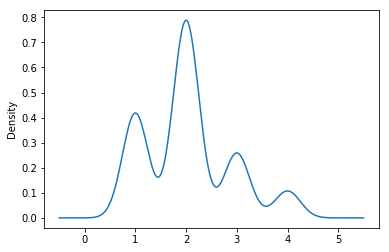

In [12]:
%matplotlib inline
df.studytime.plot(kind='density')

In [13]:
from scipy.stats import shapiro

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df.studytime)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.834196925163269, Pvalue= 6.54752810538303e-20
Sample does not look Gaussian (reject H0)


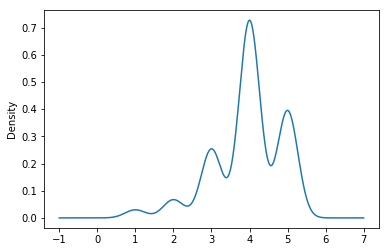

In [14]:
df.famquality.plot(kind='density')

In [15]:
W_stat, p = shapiro(df.famquality)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.8302338719367981, Pvalue= 3.9062609226142254e-20
Sample does not look Gaussian (reject H0)


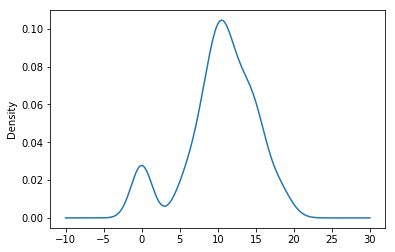

In [16]:
df.mathgrade.plot(kind='density')

In [17]:
W_stat, p = shapiro(df.mathgrade)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9287306666374207, Pvalue= 8.837573142912725e-13
Sample does not look Gaussian (reject H0)


I did not standardize any of these numerical columns because for studytime and fam quality, they are on a similar scale and range of numbers. For math grades, I did not standardize because the scael of the data matters since they are numerical grades assigned to each student that reflects performance.

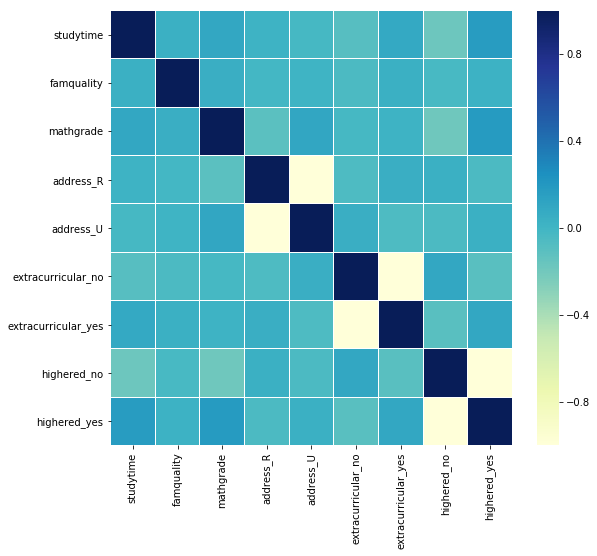

In [18]:
#correlation matrix

%matplotlib inline

corr_mat = df.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_mat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [19]:
df[['mathgrade', 'studytime', 'famquality', 'highered_yes', 'address_U']].corr()

,mathgrade,studytime,famquality,highered_yes,address_U
mathgrade,1.000000,0.097820,0.051363,0.182465,0.105756
studytime,0.097820,1.000000,0.039731,0.175081,-0.020912
famquality,0.051363,0.039731,1.000000,0.024319,0.014258
highered_yes,0.182465,0.175081,0.024319,1.000000,0.042854
address_U,0.105756,-0.020912,0.014258,0.042854,1.000000


In [20]:
#dropping columns that I didn't test for correlation, since they won't be used in my analysis.
df = df.drop(columns=['address_R', 'extracurricular_no', 'extracurricular_yes', 'highered_no'])
df.head()

,studytime,famquality,mathgrade,address_U,highered_yes
0,2,4,6,1,1
1,2,5,6,1,1
2,2,4,10,1,1
3,3,3,15,1,1
4,2,4,10,1,1


In [21]:
from scipy.stats import zscore

df['mathgrade_zscore'] = zscore(df.mathgrade)
df['studytime_zscore'] = zscore(df.studytime)
df['famquality_zscore'] = zscore(df.mathgrade)

df.head()

,studytime,famquality,mathgrade,address_U,highered_yes,mathgrade_zscore,studytime_zscore,famquality_zscore
0,2,4,6,1,1,-0.964934,-0.042286,-0.964934
1,2,5,6,1,1,-0.964934,-0.042286,-0.964934
2,2,4,10,1,1,-0.090739,-0.042286,-0.090739
3,3,3,15,1,1,1.002004,1.150779,1.002004
4,2,4,10,1,1,-0.090739,-0.042286,-0.090739


In [22]:
len(df[abs(df.mathgrade_zscore) > 2.5].index)

0

In [23]:
len(df[abs(df.studytime_zscore) > 2.5].index)

0

In [24]:
len(df[abs(df.famquality_zscore) > 2.5].index)

0

In [25]:
#no outliers

## Part IV: Linear Regression

- Create your model <br>
- Visualize results <br>
- Examine error <br>
- Check and plot residuals

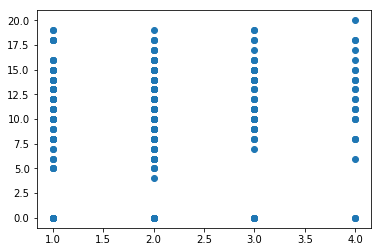

In [26]:
plt.scatter(df.studytime, df.mathgrade)

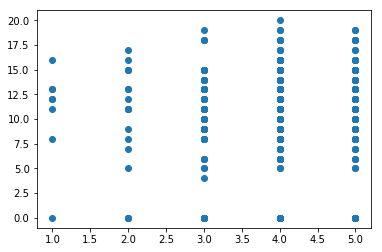

In [27]:
plt.scatter(df.famquality, df.mathgrade)

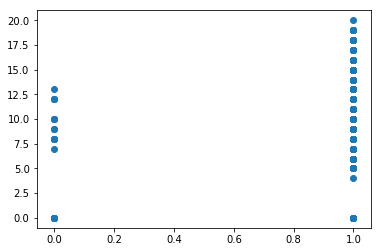

In [28]:
plt.scatter(df.highered_yes, df.mathgrade)

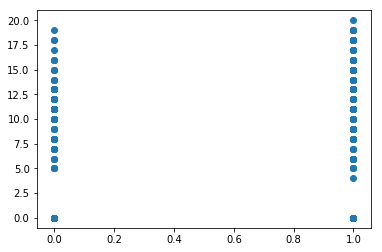

In [29]:
plt.scatter(df.address_U, df.mathgrade)

In [30]:
#None of these models appear linear, but I will still proceed with linear regression.

Text(0, 0.5, 'Predictions')

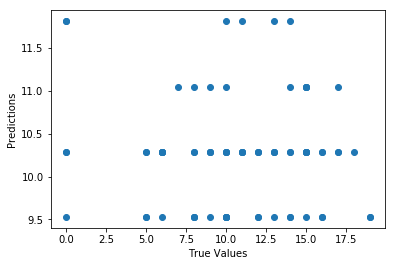

In [31]:
#linear regression, study time vs. math grade

df_x = df[["studytime"]]
df_y = df[["mathgrade"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, 
                                                   test_size=0.2, 
                                                   random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,
                        n_jobs=4)

#training the model
fit = lr.fit(x_train, y_train)

lr.intercept_

#coefficients

coef_df = pd.DataFrame({"feature": "studytime", 
                        "coeff": int(fit.coef_)},
                      index=[0])

coef_df

#predictions
preds = lr.predict(x_test)
preds[0:5]

#plotting
plt.scatter(y_test, preds) # plotting our known testing labels against our predictions
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

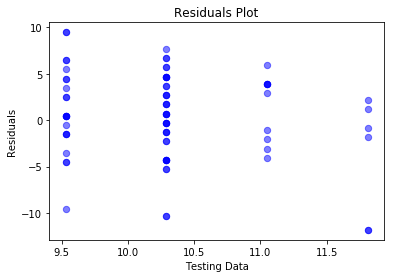

In [32]:
#residuals, study time vs. math grade

residuals = y_test - preds
plt.scatter(lr.predict(x_test), residuals,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [33]:
#RMSE, study time vs. math grade

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds) # calculate mean squared error
rmse = np.sqrt(mse) # calcualate root mean squared error
rmse

4.636045308083058

Text(0, 0.5, 'Predictions')

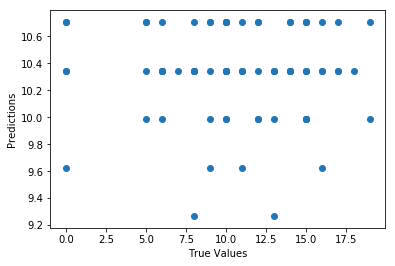

In [34]:
#linear regression, famquality vs. math grade

df_x = df[["famquality"]]
df_y = df[["mathgrade"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, 
                                                   test_size=0.2, 
                                                   random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,
                        n_jobs=4)

#training the model
fit = lr.fit(x_train, y_train)

lr.intercept_

#coefficients

coef_df = pd.DataFrame({"feature": "famquality", 
                        "coeff": int(fit.coef_)},
                      index=[0])

coef_df

#predictions
preds = lr.predict(x_test)
preds[0:5]

#plotting
plt.scatter(y_test, preds) # plotting our known testing labels against our predictions
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

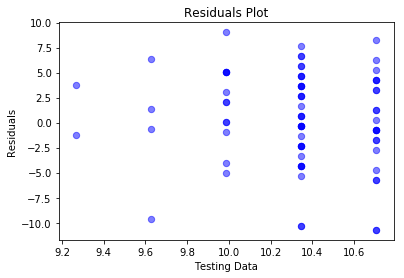

In [35]:
#residuals, famquality vs. math grade

residuals = y_test - preds
plt.scatter(lr.predict(x_test), residuals,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [36]:
#RMSE, fam quality vs. math grade
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds) # calculate mean squared error
rmse = np.sqrt(mse) # calcualate root mean squared error
rmse

4.5684085497411235

Text(0, 0.5, 'Predictions')

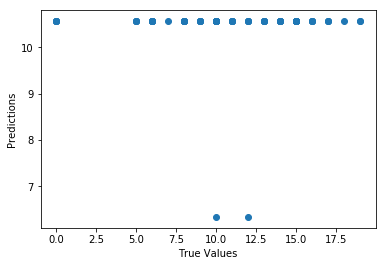

In [37]:
#linear regression, highered vs. math grade

df_x = df[["highered_yes"]]
df_y = df[["mathgrade"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, 
                                                   test_size=0.2, 
                                                   random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,
                        n_jobs=4)

#training the model
fit = lr.fit(x_train, y_train)

lr.intercept_

#coefficients

coef_df = pd.DataFrame({"feature": "highered_yes", 
                        "coeff": int(fit.coef_)},
                      index=[0])

coef_df

#predictions
preds = lr.predict(x_test)
preds[0:5]

#plotting
plt.scatter(y_test, preds) # plotting our known testing labels against our predictions
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

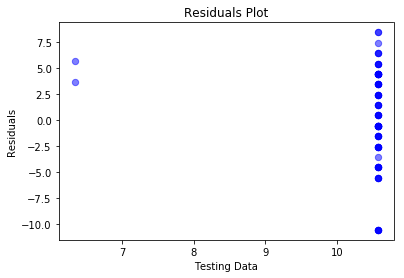

In [38]:
#residuals, higher ed vs math grade

residuals = y_test - preds
plt.scatter(lr.predict(x_test), residuals,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [39]:
#RMSE, higher ed vs. math grade
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds) # calculate mean squared error
rmse = np.sqrt(mse) # calcualate root mean squared error
rmse

4.592785631818208

Text(0, 0.5, 'Predictions')

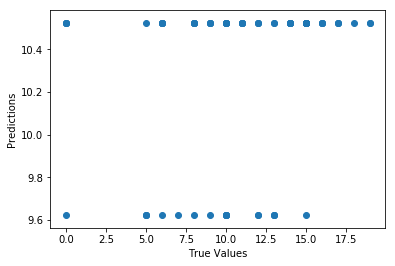

In [40]:
#linear regression, address vs. math grade

df_x = df[["address_U"]]
df_y = df[["mathgrade"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, 
                                                   test_size=0.2, 
                                                   random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,
                        n_jobs=4)

#training the model
fit = lr.fit(x_train, y_train)

lr.intercept_

#coefficients

coef_df = pd.DataFrame({"feature": "address_U", 
                        "coeff": int(fit.coef_)},
                      index=[0])

coef_df

#predictions
preds = lr.predict(x_test)
preds[0:5]

#plotting
plt.scatter(y_test, preds) # plotting our known testing labels against our predictions
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

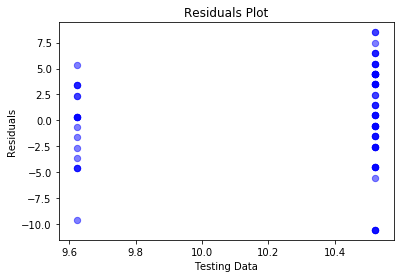

In [41]:
#residuals, address vs. math grade

residuals = y_test - preds
plt.scatter(lr.predict(x_test), residuals,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [42]:
#RMSE, address vs. math grade
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds) # calculate mean squared error
rmse = np.sqrt(mse) # calcualate root mean squared error
rmse

4.488773980872513

## Part V: Conclusion

For this data analysis, I narrowed dow to five main questions to explore with my dataset. 
<br><br>
- Is the length of study time associated with students' performance in math? <br>
- Is the number of extracurricular activites associated with students' performance in math? <br>
- How does the quality of family relationships affect students' performance in math? <br>
- Do students' motivation to pursue higher education increase their performance in math? <br>
- How do rural and urban students' performance compare in their math courses? <br><br>

Unforunately, I cannot draw any conclusion from my analysis based on linear regression because of the dataset containing mostly categorical variables. The possibility of a logistic linear regression was explored, however the target variable, math grade, is not a binary variable so it was not a feasible test to identify relationships between the interested variables and the target variable.<br><br>No linear relationships were drawn as seen  in Part IV under lines 26 through 29. Also, the data of interest show that they are not normally distributed (Part III lines 12-17) with p-values significanly less than 0.5 meaning there are significant differences in the data.<br><br>
The variable that was most heavily correlated with math grade was the categorical variable "highered_yes" , with a coefficient of 0.18. However, due to a low coefficient this does not necessarily guarantee a relationship. Also, as stated above, the linear regression does not work well on categorical variables.<br>
